In [24]:
# Logistic Regression on Diabetes Dataset
from random import seed
from random import randrange
from csv import reader
from math import exp
import pandas as pd
import os 
os.chdir(r'c:\Users\Dinesh\Desktop')
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [50]:
names = ['Col1', 'col2', 'col3', 'col4','col5', 'col6', 'col7','col8','Class']
'''
   1.Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)
'''   

dataset = pd.read_csv("diabetes.data", names = names)


In [51]:
print dataset.shape
print dataset.head(20)

(768, 9)
    Col1  col2  col3  col4  col5  col6   col7  col8  Class
0      6   148    72    35     0  33.6  0.627    50      1
1      1    85    66    29     0  26.6  0.351    31      0
2      8   183    64     0     0  23.3  0.672    32      1
3      1    89    66    23    94  28.1  0.167    21      0
4      0   137    40    35   168  43.1  2.288    33      1
5      5   116    74     0     0  25.6  0.201    30      0
6      3    78    50    32    88  31.0  0.248    26      1
7     10   115     0     0     0  35.3  0.134    29      0
8      2   197    70    45   543  30.5  0.158    53      1
9      8   125    96     0     0   0.0  0.232    54      1
10     4   110    92     0     0  37.6  0.191    30      0
11    10   168    74     0     0  38.0  0.537    34      1
12    10   139    80     0     0  27.1  1.441    57      0
13     1   189    60    23   846  30.1  0.398    59      1
14     5   166    72    19   175  25.8  0.587    51      1
15     7   100     0     0     0  30.0  0.484  

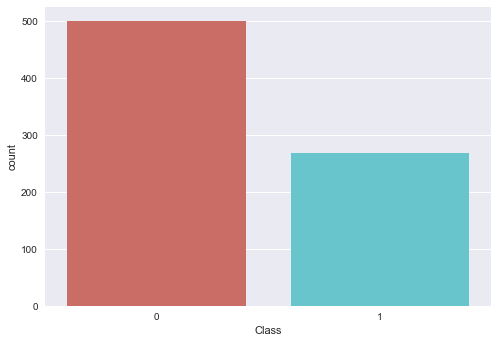

In [27]:
dataset.groupby('Class').size()
sns.countplot(x = 'Class', data=dataset, palette='hls')
plt.show()

In [52]:
#check for missing values
dataset.isnull()
dataset.isnull().sum()

Col1     0
col2     0
col3     0
col4     0
col5     0
col6     0
col7     0
col8     0
Class    0
dtype: int64

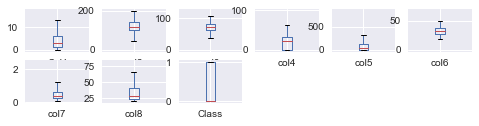

In [29]:
#Visuals to see distribution of data
dataset.plot(kind = 'box', subplots=True, layout=(6,6), sharex=False, sharey=False) 
plt.show()

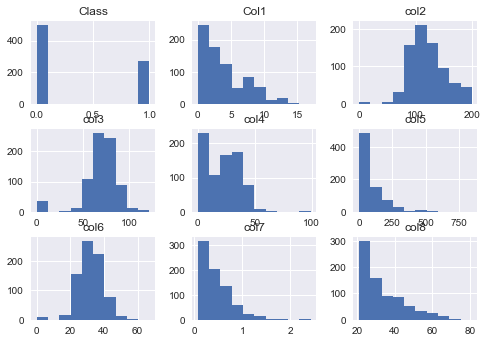

In [30]:
#Distribution of data
dataset.hist()
plt.show()

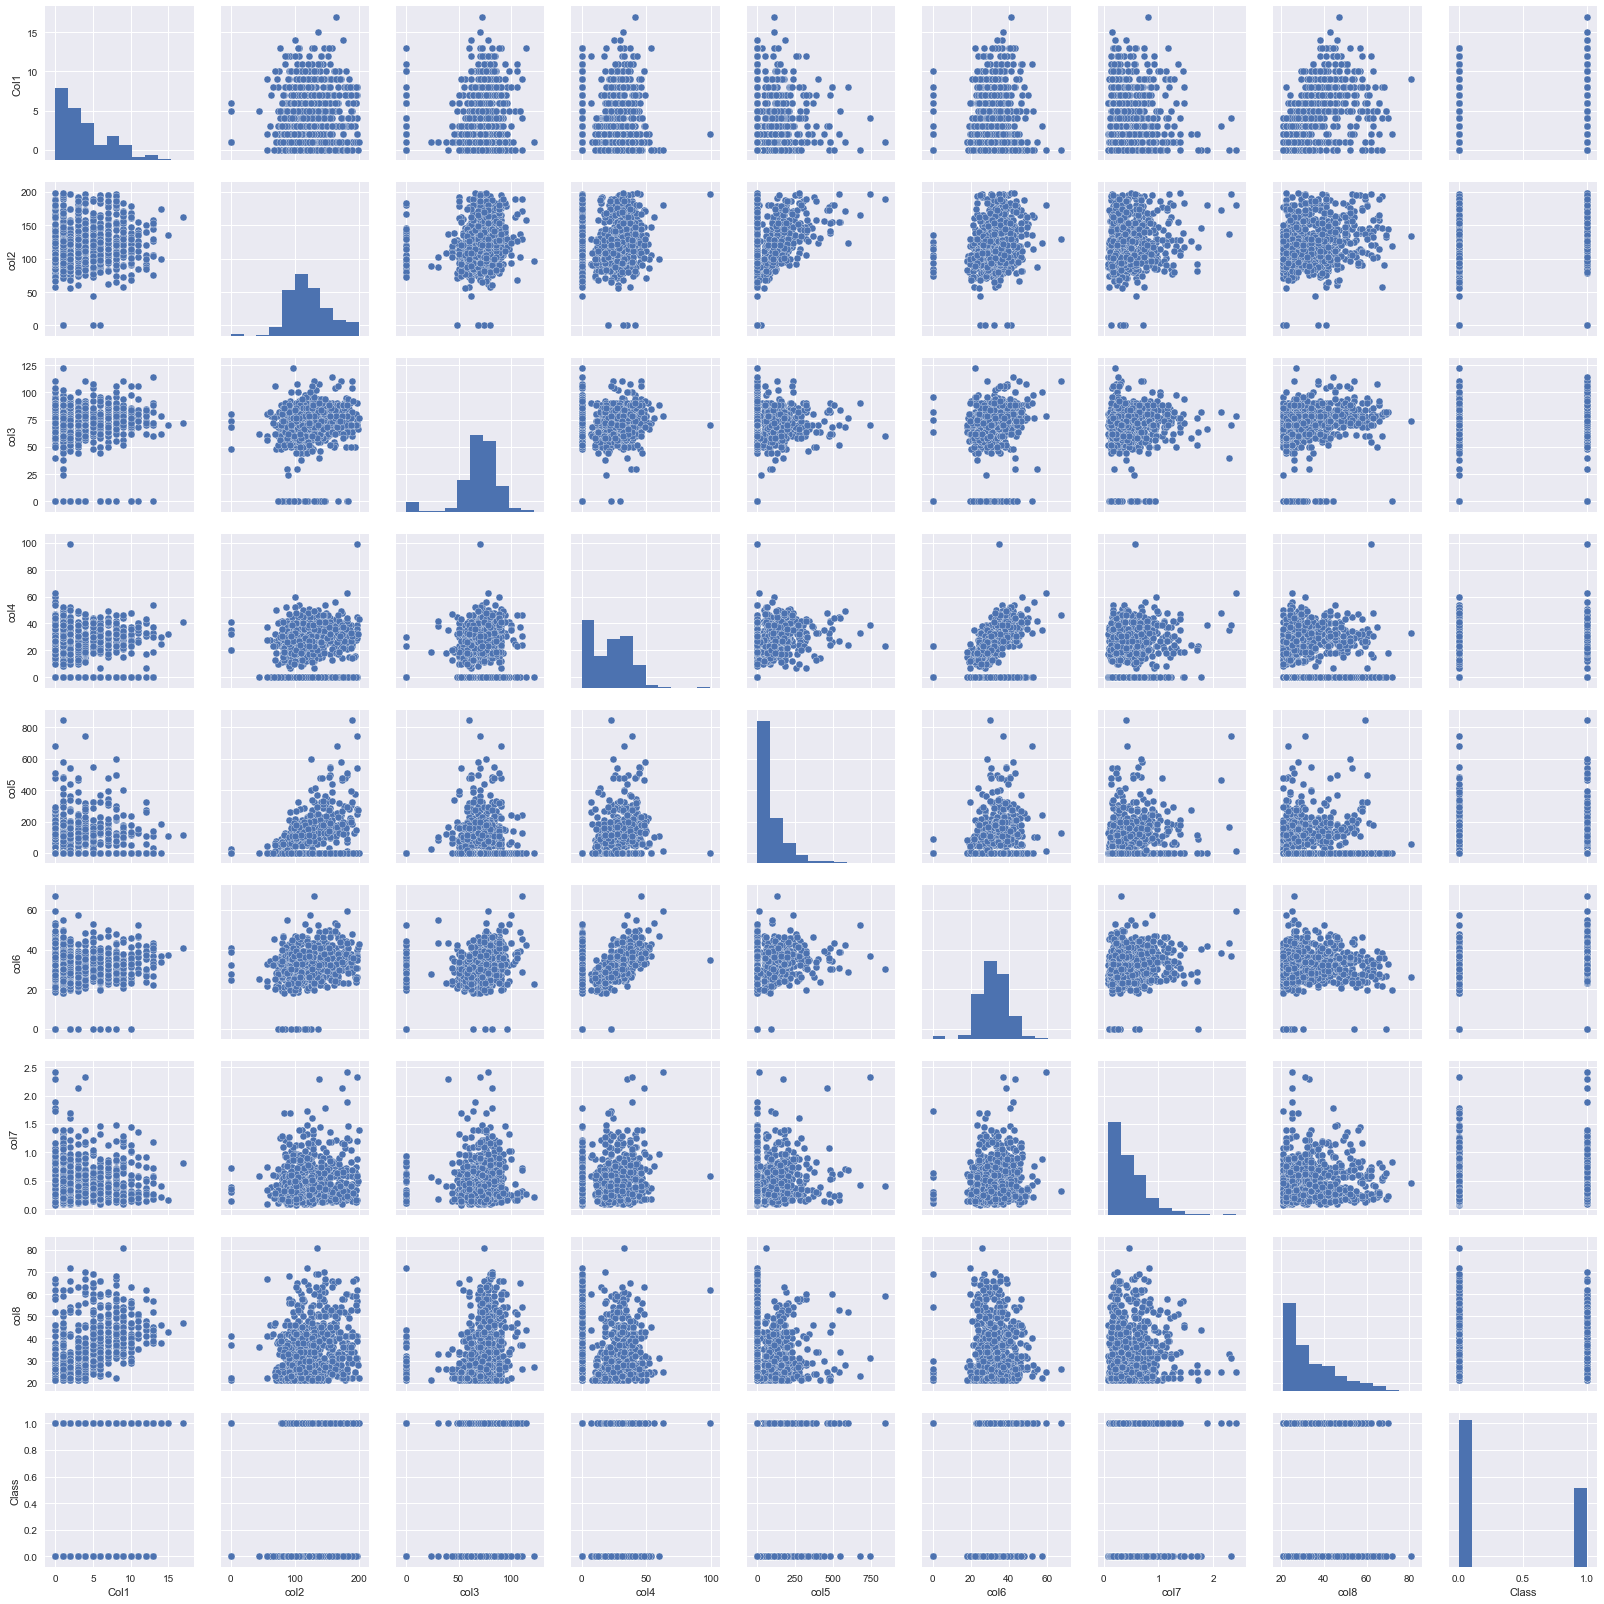

In [31]:
#Logistic regression expects linear relationship between input variables
#If there is no linear relationship 
sns.pairplot(data=dataset)
plt.show()

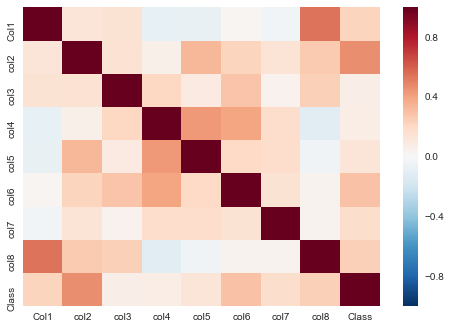

In [32]:
#Checking for independence between features
sns.heatmap(dataset.corr())
plt.show()

#remove least correlated column, of it is sparse then maximum likelihood estimation process that learns the coefficients, fail to converge
#remove columns that are highly correlated, as that could lead to overfitting


In [ ]:
#Removing noise


In [53]:
#create validation dataset 
array = dataset.values
X = array[:,0:8]
Y = array[:,8]

test_size = 0.20
seed = 3
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = test_size, random_state = seed)

In [46]:
#MinMax scaling
#minmaxscaler = MinMaxScaler()
#X_train = minmaxscaler.fit_transform(X_train)

In [54]:
#maximum-likelihood estimation process is used to come up with the coefficients
logReg = LogisticRegression()
logReg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [55]:
y_pred = logReg.predict(X_test)

In [56]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix = confusion_matrix(Y_test, y_pred)

In [59]:
print confusion_matrix 
#accuraccy = (TruePositive + TrueNegative)/(TP + FP + FN + TN)
#row1:selected
#row2: notselected

#col1:correct
#col2:not correct

[[80 12]
 [29 33]]


In [58]:
# Precision = % of selected items that are correct (tp)/(tp+fp)
# Recall = % of correct items that are selected (tp)/(tp+fn)
# f1 measure = 2PR/(P+R) This is a harmonic mean of P and R Best is 1 and worst is 0

print classification_report(Y_test, y_pred)

             precision    recall  f1-score   support

        0.0       0.73      0.87      0.80        92
        1.0       0.73      0.53      0.62        62

avg / total       0.73      0.73      0.72       154



In [ ]:
#Sensitivity: Truly positive proportion captured by the model correctly P (Y = 1) Probability of y being correct
#Specificity: Truly Negative proportion captured by the model correctly P (Y = 0) Probability of y being incorrect
#ROC Curve: http://www.hpl.hp.com/techreports/2003/HPL-2003-4.pdf

